# ** Predicting Electric vehicle range based on features ** 

# Table of contents :
1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing

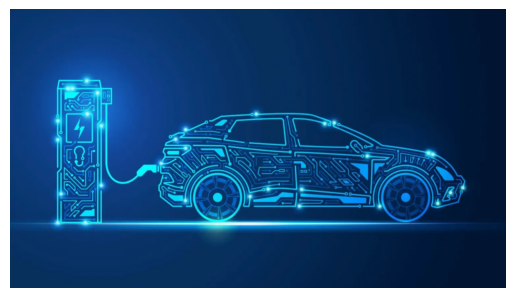

In [292]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
img = mpimg.imread("C:\\Users\\ajayc\\Downloads\\1733781781100.png")

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

# 1. **Introduction**

The Electric Vehicle population dataset from Washington Technology Solutions (WaTech) is part of the Washington Open Data Program, which allows all state agencies to publish public data at https://data.wa.gov.Categorical features in the dataset are encoded, while numerical features are transformed using the Yeo-Johnson method to correct skewness. Outliers are handled using a capping technique. Five machine learning regression models are implemented: Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Gradient Boosting. These models are evaluated using performance metrics such as MAE, MSE, R² score, and RMSE. The objective is to identify the best-performing model and the key features that influence electric vehicle range prediction. This analysis can support companies in developing effective sales and marketing strategies.

# 2. **Goal of the Project**

Build a machine learning model that can accurately predict the Electric vehicle range ,using various feature.

# 3.**Data Story/Source**:

The dataset used in this project is the Electric Vehicle Population dataset, originally sourced from Data.gov. It contains 235,692 records and 17 features, comprising both numerical and categorical variables that provide detailed information about electric vehicles in Washington, USA.

Each entry in the dataset represents a vehicle record, with attributes such as VIN (1–10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, and 2020 Census Tract.

The target variable is Electric Range, which indicates the driving range of each electric vehicle in the dataset.

About dataset

Source of the data is from Data.gov Machine Learning Repository.

Link:https://catalog.data.gov/dataset/electric-vehicle-population-data

# 4. **Data Preprocessing**

1.Importing Libraries

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV 
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
import joblib

**2. Load the dataset**

In [15]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235687,1C4RJXN62R,Pierce,Tacoma,WA,98407.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,27.0,267004272,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
235688,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,0.0,10.0,198794410,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
235689,3FA6P0SU2F,King,Redmond,WA,98052.0,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,261742288,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
235690,WA1BCBFZ6P,Snohomish,Lake Stevens,WA,98258.0,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,253474854,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10


# 3.Understand the data structure

In [17]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [19]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 no

In [20]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(235692, 17)

In [21]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [22]:
print("statistical summary:")
print(df.describe())

statistical summary:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  235689.000000  235692.000000   235656.000000  235656.000000   
mean    98177.656463    2021.406658       46.262569     787.268328   
std      2524.218661       2.991908       84.045829    7177.668305   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98374.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2025.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         235198.000000    2.356920e+05       2.356890e+05  
mean              28.879519    2.353127e+08       5.298066e+10  
std               14.904644    6.799098e+07       1.521066e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.00

In [23]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dty

In [24]:
print("null value percentage:")
null_percentage=(df.isnull().sum()/len(df))*100
print(null_percentage)

null value percentage:
VIN (1-10)                                           0.000000
County                                               0.001273
City                                                 0.001273
State                                                0.000000
Postal Code                                          0.001273
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.015274
Base MSRP                                            0.015274
Legislative District                                 0.209596
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004243
Electric Utility                               

In [25]:
df.duplicated().sum()

0

In [27]:
# Handling Null Values
# numerical columns
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].mean())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].mean())
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].fillna(df['DOL Vehicle ID'].mean())
df['2020 Census Tract']=df['2020 Census Tract'].fillna(df['2020 Census Tract'].mean())

In [28]:
# categorical columns
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])
df['Vehicle Location']=df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])

In [29]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [30]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


# check skewness of the dataset 

In [32]:
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID','2020 Census Tract']

# Compute skewness
skewness_values = df[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code            -29.436487
Model Year              -1.269370
Electric Range           1.848788
Base MSRP               15.790603
Legislative District    -0.430313
DOL Vehicle ID           0.055456
2020 Census Tract      -27.733378
dtype: float64


The dataset is asymmetrical.so we choose IQR method for outlier detection 

In [34]:
# Columns to check for outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID','2020 Census Tract']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns)

# Display outliers
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}:\n{outlier_values}\n")

Outliers in Postal Code:
19        98908.0
31        98908.0
34        98942.0
44        98902.0
51        98908.0
           ...   
235675    99019.0
235676    99206.0
235677    99208.0
235682    99352.0
235683    99362.0
Name: Postal Code, Length: 15349, dtype: float64

Outliers in Model Year:
5         2012
26        2013
28        2013
118       2012
132       2013
          ... 
235445    2013
235486    2012
235498    2013
235518    2013
235678    2013
Name: Model Year, Length: 6455, dtype: int64

Outliers in Electric Range:
0         220.0
1         291.0
5         265.0
8         215.0
9         215.0
          ...  
235656    220.0
235658    259.0
235660    291.0
235681    249.0
235688    249.0
Name: Electric Range, Length: 38754, dtype: float64

Outliers in Base MSRP:
5         59900.0
46        69900.0
56        31950.0
101       44100.0
139       32250.0
           ...   
235566    31950.0
235573    69900.0
235614    52900.0
235621    31950.0
235636    31950.0
Name: Base MSR

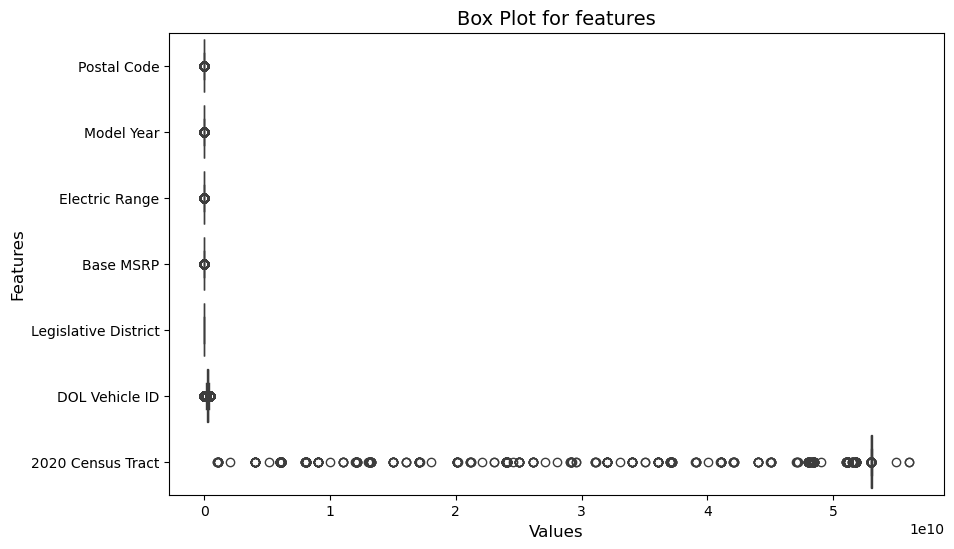

In [35]:
#Visualise the outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID','2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [36]:
# Using capping method for handling outliers instead of outlier removal
# columns for capping outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID','2020 Census Tract']

# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Capping outliers
    return df

# Apply capping
df_capped = cap_outliers(df, columns)

print(df_capped)

        VIN (1-10)     County          City State  Postal Code  Model Year  \
0       5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
1       5YJYGDEE3L     Kitsap       Poulsbo    WA      98370.0        2020   
2       KM8KRDAF5P     Kitsap        Olalla    WA      98359.0        2023   
3       5UXTA6C0XM     Kitsap       Seabeck    WA      98380.0        2021   
4       JTMAB3FV7P   Thurston       Rainier    WA      98576.0        2023   
...            ...        ...           ...   ...          ...         ...   
235687  1C4RJXN62R     Pierce        Tacoma    WA      98407.0        2024   
235688  5YJSA1E28J  Snohomish      Stanwood    WA      98292.0        2018   
235689  3FA6P0SU2F       King       Redmond    WA      98052.0        2015   
235690  WA1BCBFZ6P  Snohomish  Lake Stevens    WA      98258.0        2023   
235691  WBY33AW03P       King      Issaquah    WA      98027.0        2023   

           Make       Model                   Electric Vehicle 

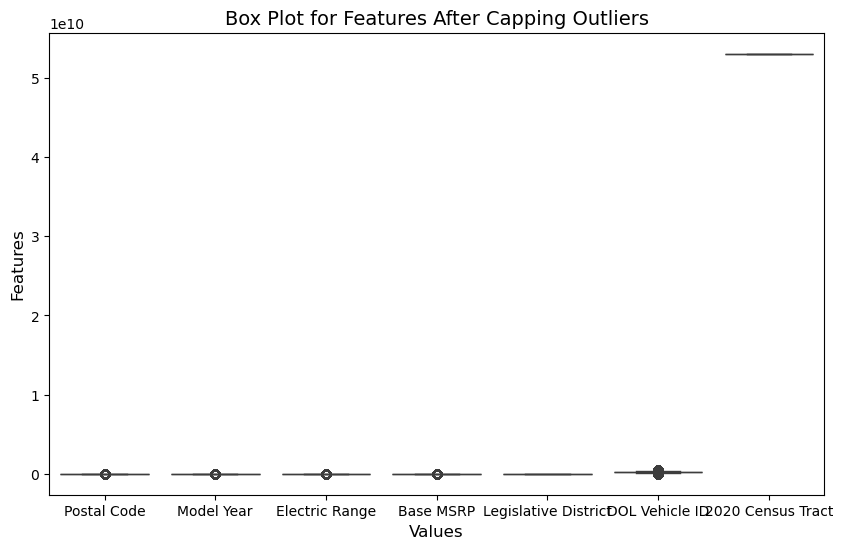

In [37]:
# Plotting the Box Plot after capping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[columns])  # No 'orient' needed
plt.title('Box Plot for Features After Capping Outliers', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [38]:
# Data shape after capoing method
df_capped.shape

(235692, 17)

In [39]:
#Check skewness after outlier handling 
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', 'DOL Vehicle ID','2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code             1.751480
Model Year             -1.196215
Electric Range          1.831156
Base MSRP               8.406592
Legislative District   -0.430313
DOL Vehicle ID          0.062816
2020 Census Tract       0.210279
dtype: float64


In [40]:
# To understand the datatypes of the dataset
df_capped.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                       float64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# Exploratory data analysis (EDA)

In [42]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Uni-variate analysis 

In [44]:
# Taking a random sample of 50,000 rows from the DataFrame df_new
df_random = df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_random.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
99117,LVYBR0AL0J,Clark,Vancouver,WA,98686.0,2018,VOLVO,S90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,17.0,232611389.0,POINT (-122.62731 45.71668),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
71440,7SAYGDEF9N,King,Normandy Park,WA,98166.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,218047287.0,POINT (-122.34102 47.46593),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
100012,3FA6P0PUXE,Snohomish,Arlington,WA,98223.0,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,39.0,198740972.0,POINT (-122.1264 48.19471),PUGET SOUND ENERGY INC,5.306105e+10
91904,1V2WNPE80P,Thurston,Olympia,WA,98501.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,22.0,244745889.0,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
123868,1C4RJYB63R,King,Renton,WA,98057.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,11.0,263271354.0,POINT (-122.20489 47.47532),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


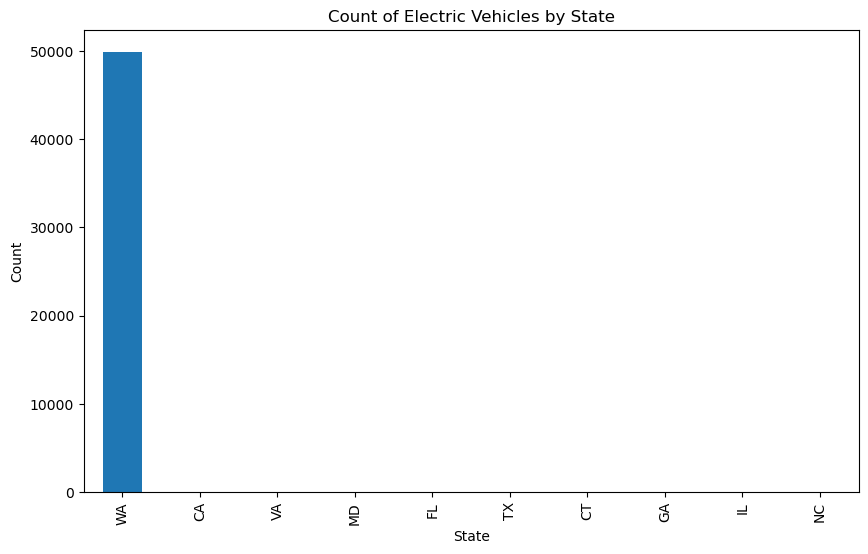

In [45]:
# Distribution of number of Electric Vehicles by State
plt.figure(figsize=(10, 6))
df_random['State'].value_counts().head(10).plot(kind='bar')
plt.title("Count of Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

The most number of electric vehicles are in WA (Washington state)

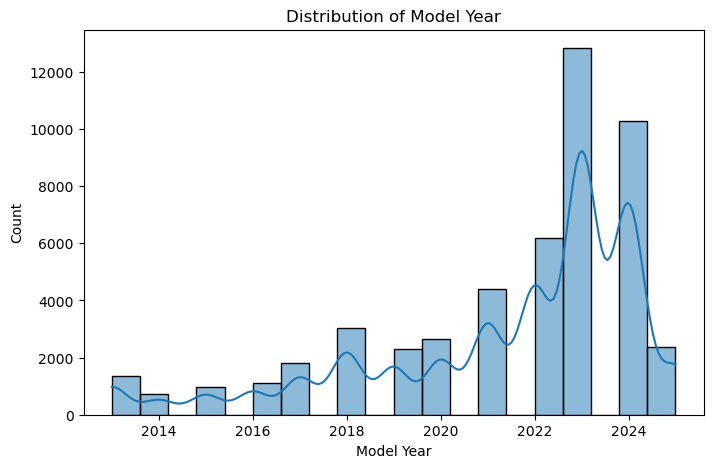

In [47]:
# Distribution of Model Year
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Model Year'], bins=20, kde=True)
plt.title("Distribution of Model Year")
plt.show()

In this diagram, the year 2022 are the most number of electri vehicle produced 

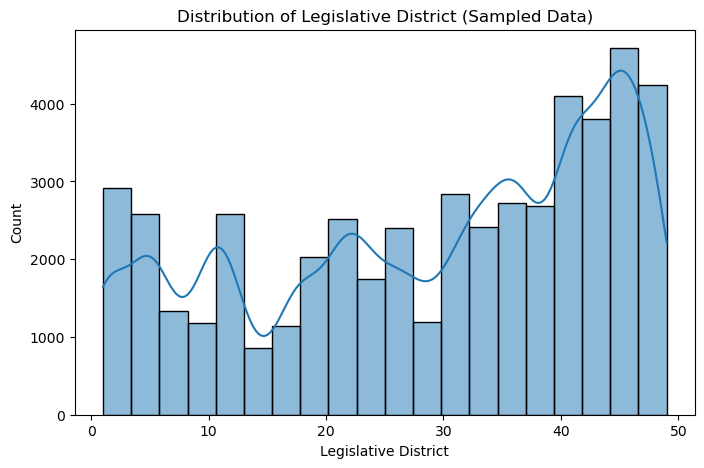

In [49]:
# Histogram of Legislative District
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Legislative District'], bins=20, kde=True)
plt.title("Distribution of Legislative District (Sampled Data)")
plt.show()

In this diagram, the 40-50 of legislative district are the most number of electric vehicles.

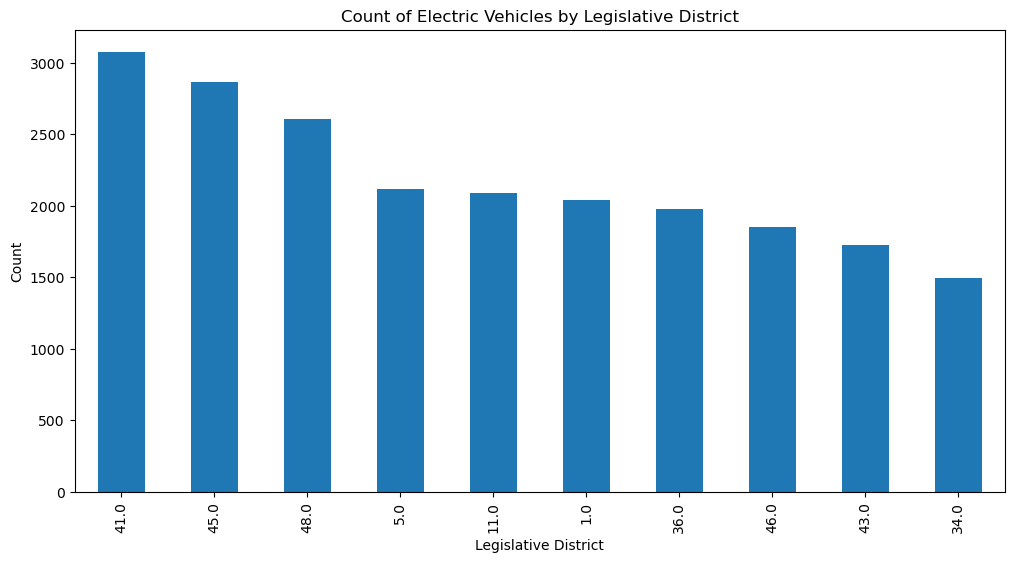

In [51]:
# Top 10 Number of Electric vehicles per Legislative District
plt.figure(figsize=(12, 6))
df_random['Legislative District'].value_counts().head(10).plot(kind='bar')
plt.title("Count of Electric Vehicles by Legislative District")
plt.xlabel("Legislative District")
plt.ylabel("Count")
plt.show()

In this diagram, the 41.0 of legislative district are the most number of electric vehicles.

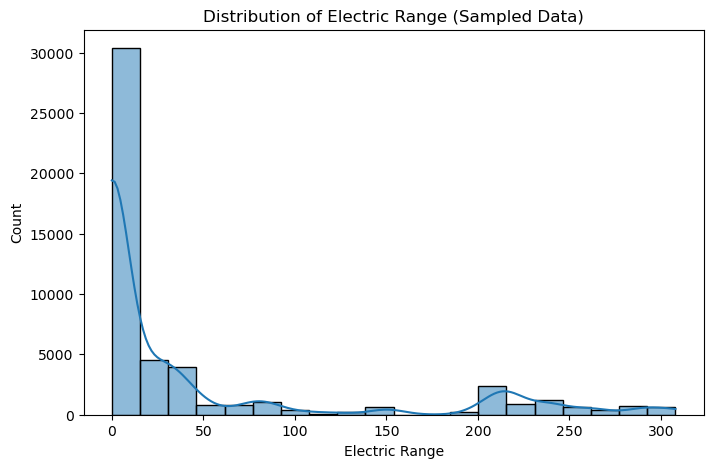

In [53]:
# Histogram of Electric Range with a sample
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range (Sampled Data)")
plt.show()

-- Most vehicles have a lower Electric Range, with a few models offering much higher ranges.

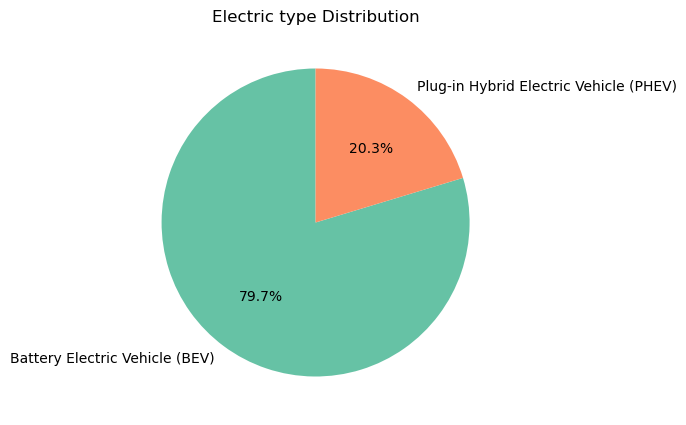

In [54]:
# Pie Diagram for Electric Vehicle Types(percentage distribution)
plt.figure(figsize=(8, 5))
df_random['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Electric type Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()

In this diagram, most of the electric vehicles are BEV type (Battery electric vehicle-79.7%).

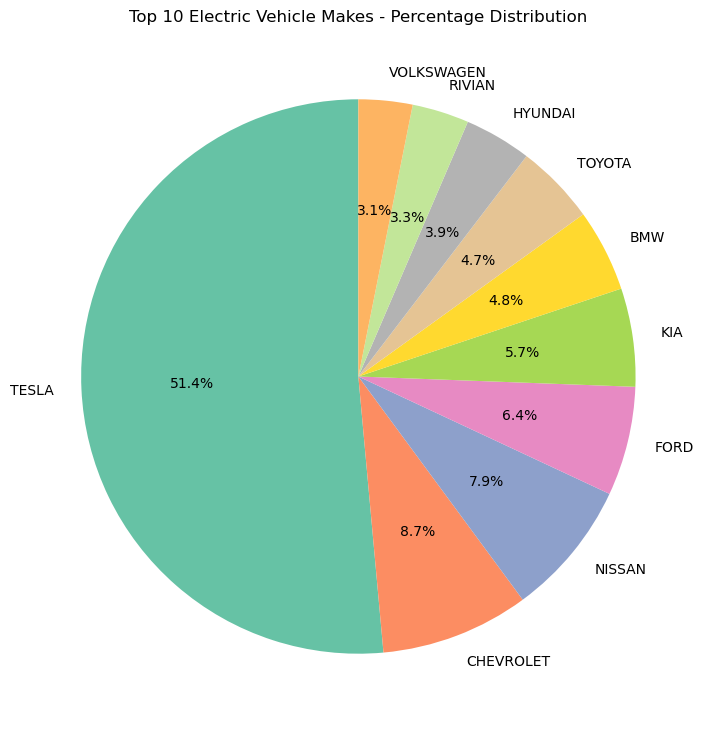

In [56]:
# Pie Chart showing Top 10 Electric Vehicle Makes by Percentage
plt.figure(figsize=(9, 9))
df_random['Make'].value_counts(normalize=True).head(10).plot.pie(
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#c2e699', '#fdb462'],
    startangle=90
)
plt.title("Top 10 Electric Vehicle Makes - Percentage Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.show()

Tesla is the most number Electric vehicle makers 51.4%

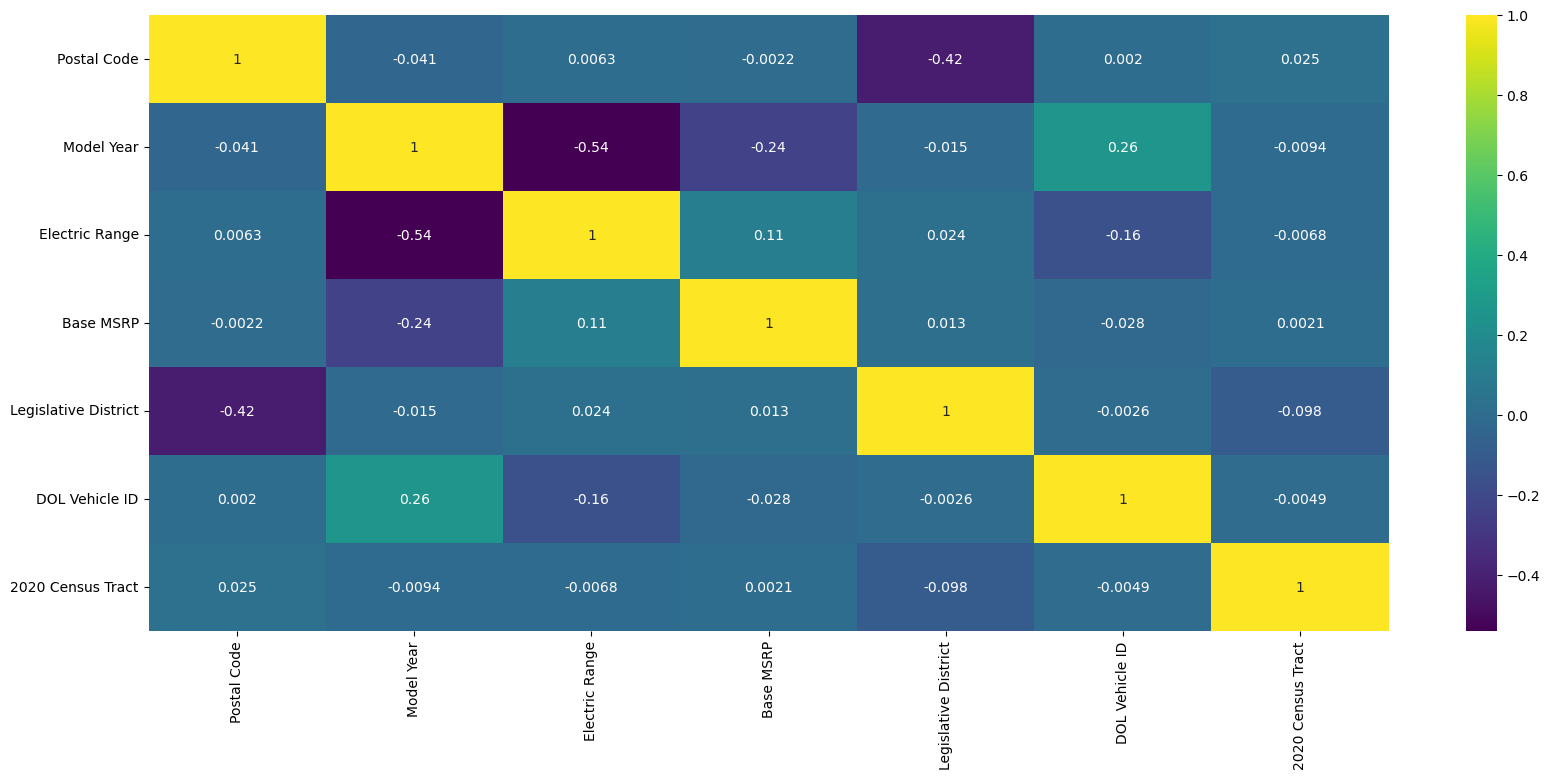

In [58]:
#Correlation matrix : Relationship between the numerical columns 
# Compute the correlation matrix
correlation_matrix = df_random.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Formatting
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()

-- The correlation matrix shows that some features have moderate relationships, while most numerical columns are weakly correlated with each other. In the correlation metrix, there is no multicollinearity.

# BI-Variate analysis 

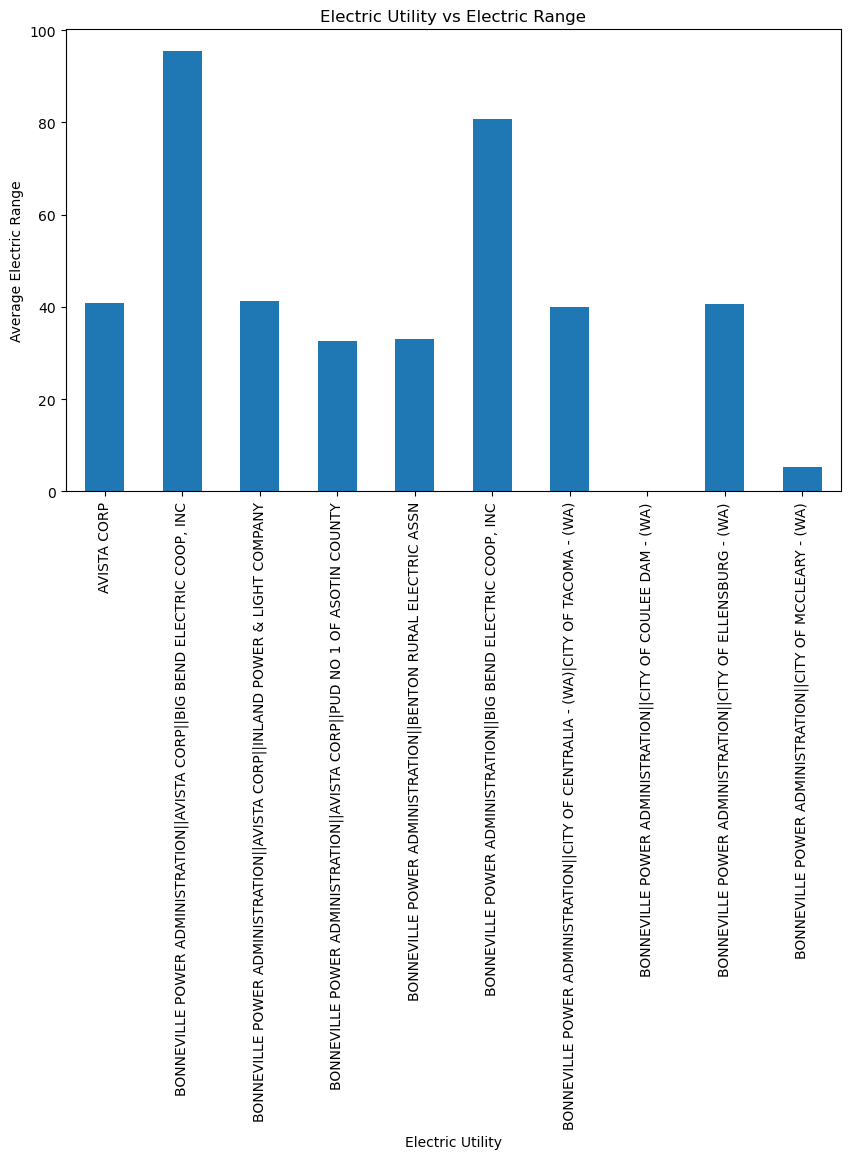

In [61]:
# Top 10 number of Electric Utility vs Electric Range (Bar Chart)
plt.figure(figsize=(10, 6))
df_random.groupby('Electric Utility')['Electric Range'].mean().head(10).plot(kind='bar')
plt.title("Electric Utility vs Electric Range")
plt.xlabel("Electric Utility")
plt.ylabel("Average Electric Range")
plt.xticks(rotation=90)
plt.show()

In this diagram, the AVISTA CORP is the highest electric utility provider.It indicate better infrastructure, efficient power supply, or more advanced vehicle models using their services.

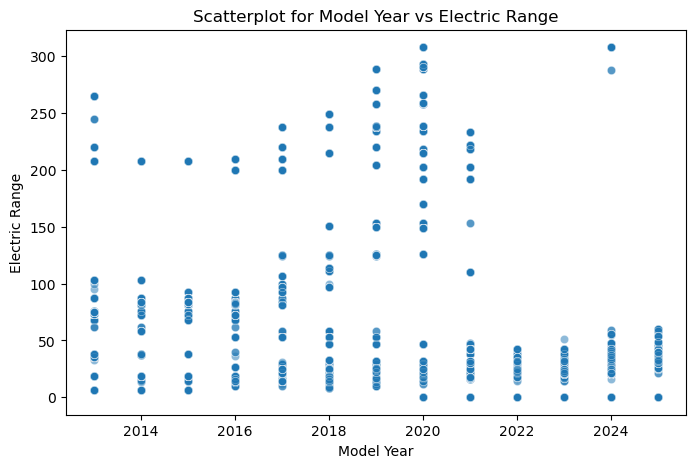

In [63]:
# Relationship between Model Year and Electric Range 
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Model Year'], y=df_random['Electric Range'], alpha=0.5)
plt.title("Scatterplot for Model Year vs Electric Range")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

The scatterplot shows that newer model years generally have higher electric ranges, indicating technological improvements over time

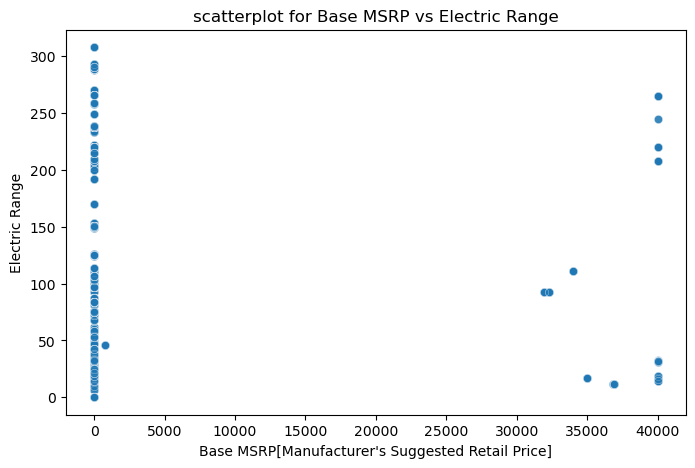

In [64]:
# Base MSRP vs Electric Range
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_random['Base MSRP'], y=df_random['Electric Range'], alpha=0.5)
plt.title("scatterplot for Base MSRP vs Electric Range")
plt.xlabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.ylabel("Electric Range")
plt.show()

-- The scatterplot shows that higher-priced vehicles generally tend to have longer electric ranges, but there is considerable variation across different price levels.

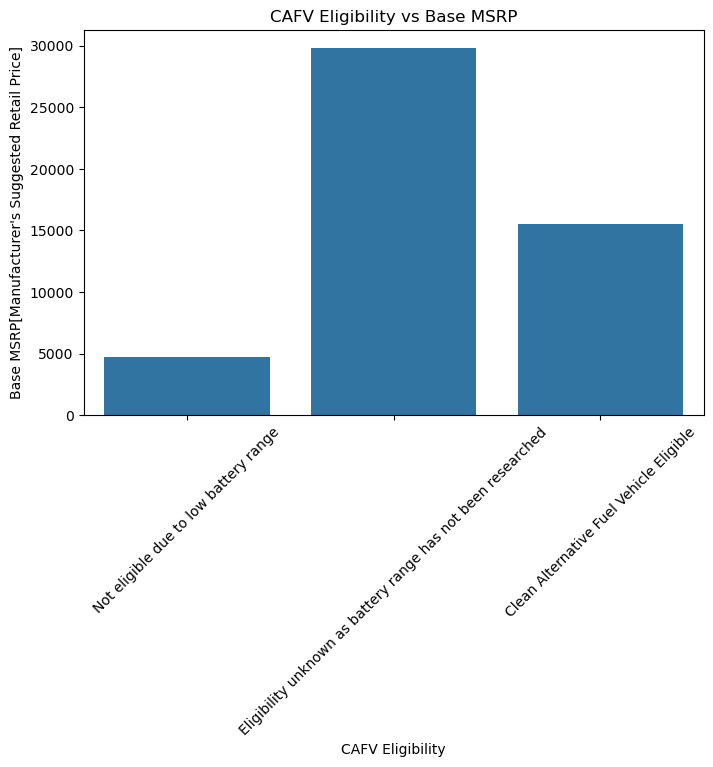

In [65]:
# Clean Alternative Fuel Vehicle (CAFV) Eligibility vs Base MSRP
plt.figure(figsize=(8, 5))
sns.countplot(x=df_random['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("CAFV Eligibility vs Base MSRP")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.xticks(rotation=45)
plt.show()

-- Most vehicles in the sample are eligible for Clean Alternative Fuel Vehicle (CAFV) programs, with fewer vehicles classified as non-eligible.

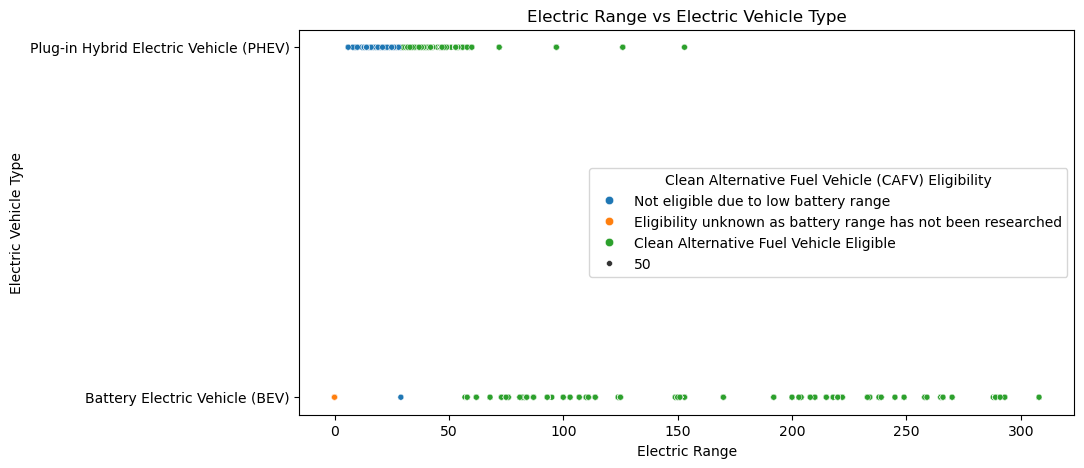

In [66]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_random, 
    x="Electric Range", 
    y="Electric Vehicle Type", 
    hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
    size=50  # This is incorrect, should be removed or modified
)

# Title and labels
plt.title('Electric Range vs Electric Vehicle Type')
plt.xlabel("Electric Range")
plt.ylabel("Electric Vehicle Type")

# Show plot
plt.show()

-- The scatter plot shows the relationship between electric range and vehicle type, with colors indicating Clean Alternative Fuel Vehicle (CAFV) eligibility. There is no meaningful size variation in the points due to the incorrect use of the size parameter.

# multivariate analysis

<Axes: >

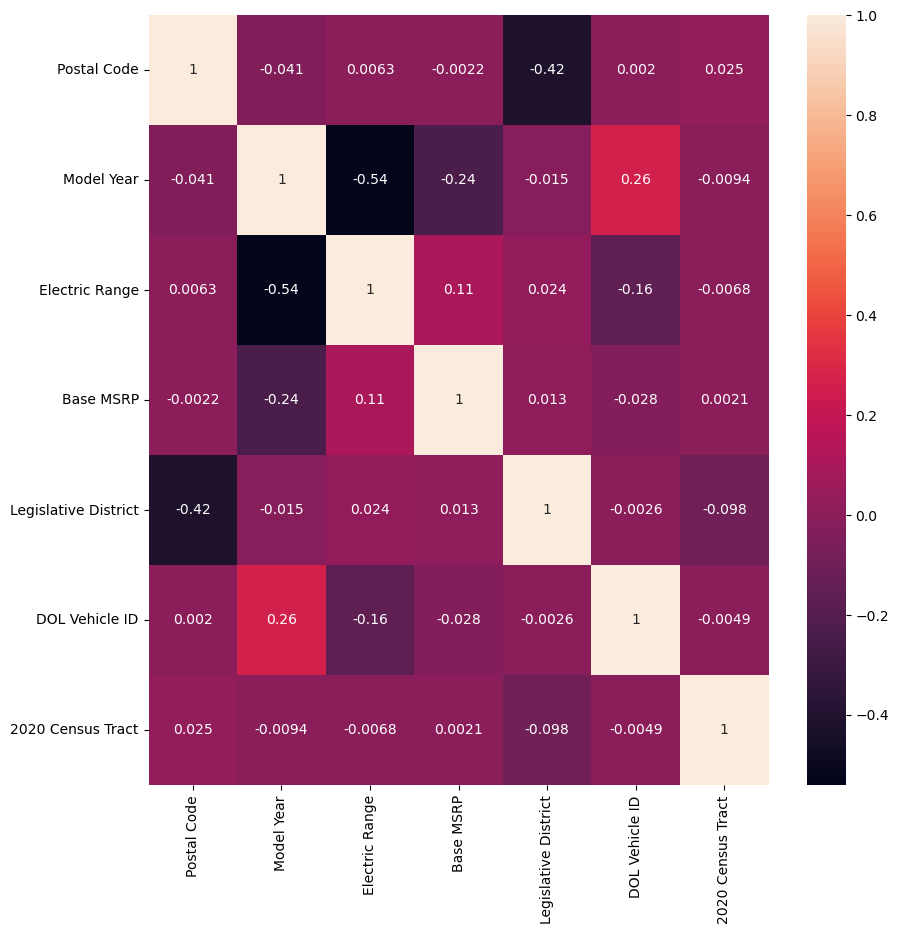

In [68]:
correlation_matrix = df_random.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)

-- The heatmap shows the correlation between numeric variables, highlighting which variables are strongly or weakly related to each other.

# Encoding categorical data

In [70]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()

print("Categorical_columns:",categorical_columns)

Categorical_columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [71]:
# Converting categorical columns into numerical
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df)

        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0             4317      94   628     45      98178.0        2019    39     96   
1             5336      96   554     45      98370.0        2020    39     99   
2             7776      96   497     45      98359.0        2023    17     84   
3             4085      96   625     45      98380.0        2021     5    164   
4             7041     191   569     45      98576.0        2023    41    128   
...            ...     ...   ...    ...          ...         ...   ...    ...   
235687          80     148   689     45      98407.0        2024    19    162   
235688        4641     178   672     45      98292.0        2018    39     97   
235689        2723      94   575     45      98052.0        2015    13     62   
235690        9940     178   352     45      98258.0        2023     2    117   
235691       11078      94   320     45      98027.0        2023     5     77   

        Electric Vehicle Ty

In [72]:
# Selecting the first 100 rows
correlation_matrix = df_capped.corr(numeric_only=True)
print(correlation_matrix.corr()["Electric Range"].sort_values(ascending=False))

Electric Range                                       1.000000
Base MSRP                                            0.277854
Vehicle Location                                     0.067136
Make                                                 0.048895
Legislative District                                 0.048087
Postal Code                                          0.023183
City                                                 0.022315
2020 Census Tract                                    0.018363
State                                                0.017705
County                                               0.017515
Electric Utility                                    -0.026922
Model                                               -0.089736
Electric Vehicle Type                               -0.126381
VIN (1-10)                                          -0.312104
DOL Vehicle ID                                      -0.355316
Model Year                                          -0.821899
Clean Al

# Feature selection

In [74]:
X = df_capped.drop(columns=["Electric Range"])  # Features
y = df_capped["Electric Range"]  # Target

select_k = SelectKBest(score_func=f_classif, k=4)  # Selecting top 10 features
X_selected = select_k.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[select_k.get_support()]
selected_scores = select_k.scores_[select_k.get_support()]

print("Selected Features:\n", selected_features)
print("Feature Scores based on select_k:\n", selected_scores)

Selected Features:
 Index(['Model Year', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP'],
      dtype='object')
Feature Scores based on select_k:
 [   9440.53770041 1554667.76444467              inf    2619.72292175]


For model building and evaluation, I chose 50,000 rows from the dataset because it contains more than 200,000 rows, and processing the entire dataset takes too much time.

In [76]:
# Taking a random sample of 50,000 rows 
df_sample= df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_sample.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
99117,9125,36,730,45,98686.0,2018,44,136,1,2,21.0,0.0,17.0,232611389.0,567,36,5.301104e+10
71440,6167,94,475,45,98166.0,2022,39,99,0,1,0.0,0.0,33.0,218047287.0,465,74,5.303303e+10
100012,2700,178,25,45,98223.0,2014,13,62,1,2,19.0,0.0,39.0,198740972.0,373,73,5.306105e+10
91904,2285,191,500,45,98501.0,2023,43,82,0,1,0.0,0.0,22.0,244745889.0,625,73,5.306701e+10
123868,137,94,577,45,98057.0,2024,19,67,1,2,25.0,0.0,11.0,263271354.0,397,74,5.303303e+10


# Split Data into Training and Testing Sets

In [78]:
X = df_sample.drop(columns=["Electric Range"])  # Features
y = df_sample["Electric Range"]  # Target

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train)
print("\n Testing data (Features):")
print(X_test)


 Training data (Features):
        VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
74810          952      94   339     45      98033.0        2023     8     20   
207576        4934      94   628     45      98121.0        2015    39     97   
95475          791      36   730     45      98663.0        2020     8     21   
130365        4225      36   751     45      98671.0        2024    39     96   
44836         7164      36   730     45      98682.0        2023    41    128   
...            ...     ...   ...    ...          ...         ...   ...    ...   
28006         4248      94    83     45      98168.0        2022    39     96   
124459        4261     178   352     45      98258.0        2019    39     96   
64311          864      16   582     45      99350.0        2017     8     21   
121186        7064     204    50     45      98229.0        2024    38    141   
107168        4736      36   730     45      98686.0        2024    39     97   


# Feature scaling 

In [81]:
scaler_standard=StandardScaler()
X_train_scaled=scaler_standard.fit_transform(X_train)
X_test_scaled=scaler_standard.transform(X_test)

In [82]:
print("\n  X _train_scaled:")
print(X_train_scaled)
print("\n X_test_scaled:")
print(X_test_scaled)


  X _train_scaled:
[[-1.4466668  -0.44125852 -0.42675204 ... -0.28374828  0.67732607
  -0.4289912 ]
 [-0.1377185  -0.44125852  0.80297394 ...  0.30841451 -0.19965508
  -0.42992896]
 [-1.49959013 -1.68580124  1.23699488 ...  1.28062206 -1.28298473
  -1.7670949 ]
 ...
 [-1.47559384 -2.1149539   0.60723901 ... -1.98953062 -2.52107577
  -2.13417536]
 [ 0.56244721  1.91908111 -1.65647803 ...  0.67078278  0.7289132
   2.00462729]
 [-0.20280433 -1.68580124  1.23699488 ...  1.19223955 -1.28298473
  -1.76710659]]

 X_test_scaled:
[[ 1.48975589 -0.44125852  0.80297394 ...  0.0962965  -0.19965508
  -0.42978901]
 [ 0.15155184 -0.44125852  0.72212691 ... -0.7433373   0.67732607
  -0.42840012]
 [ 2.30595846  1.91908111 -1.65647803 ...  0.71497403  0.7289132
   2.00460909]
 ...
 [-0.64690005  1.42555555  0.9519027  ... -2.84684091 -3.03694703
   1.39649212]
 [ 0.25082416 -2.1149539   0.60723901 ... -1.98953062 -2.52107577
  -2.13417536]
 [ 0.25476876 -1.68580124  1.23699488 ...  1.28062206 -1.282984

# Model training 

In [84]:
models={
       "Linear Regression": LinearRegression(),
       "Decision Tree Regressor": DecisionTreeRegressor(),
       "K-Nearest Neighbour Regressor":KNeighborsRegressor(),
       "Random Forest Regressor": RandomForestRegressor(),
       "Gradient Boosting Regressor":GradientBoostingRegressor()
}

# Model Evaluation

In [86]:
model_results={}
for name,model in models.items():
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    rmse=mean_squared_error(y_test,predictions,squared=False)
    model_results[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

# calculate evaluation metrics

In [88]:
for name,metrics in model_results.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Linear Regression performance:
MAE:40.9366
MSE:3197.2814
R2:0.5419
RMSE:56.5445

Decision Tree Regressor performance:
MAE:0.0836
MSE:4.2676
R2:0.9994
RMSE:2.0658

K-Nearest Neighbour Regressor performance:
MAE:46.2680
MSE:5483.9992
R2:0.2143
RMSE:74.0540

Random Forest Regressor performance:
MAE:0.1299
MSE:3.6301
R2:0.9995
RMSE:1.9053

Gradient Boosting Regressor performance:
MAE:3.1830
MSE:59.8184
R2:0.9914
RMSE:7.7342


# To find overfitting in the models 

In [90]:
# Overfitting Linear regression using Ridge (L2 regularization)
lin_reg = Ridge(alpha=0.1, max_iter=1000)
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [91]:
print("Overfitted Linear Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Linear Regression with L2 - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Linear Regression - Train Accuracy: 0.5484598405465427
Linear Regression with L2 - Test Accuracy: 0.5419149464858439


In [92]:
#Overfitting K-Nearest Neighbour Regression 
KNN_reg=KNeighborsRegressor(n_neighbors=4)
KNN_reg.fit(X_train, y_train)
y_train_pred = KNN_reg.predict(X_train)
y_test_pred = KNN_reg.predict(X_test)

In [93]:
print("Overfitted K-Nearest Neighbour Regressor- Train Accuracy:", r2_score(y_train, y_train_pred))
print("K-Nearest Neighbour Regressor - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted K-Nearest Neighbour Regressor- Train Accuracy: 0.526491194870456
K-Nearest Neighbour Regressor - Test Accuracy: 0.184304367027319


In [94]:
#Overfitting Decision tree Regression 
Dec_reg=DecisionTreeRegressor(random_state=42,max_depth=6,min_samples_split=10,min_samples_leaf=5)
Dec_reg.fit(X_train, y_train)
y_train_pred = Dec_reg.predict(X_train)
y_test_pred = Dec_reg.predict(X_test)

In [95]:
print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 0.9903935781004326
Overfitted DecisionTree Regression - Test Accuracy: 0.9892894340510647


In [96]:
# Overfitting Random forest Regression 
Random_reg=RandomForestRegressor(random_state=42)
Random_reg.fit(X_train, y_train)
y_train_pred = Random_reg.predict(X_train)
y_test_pred = Random_reg.predict(X_test)

In [97]:
print("Overfitted Random Forest Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Random Forest Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Random Forest Regression - Train Accuracy: 0.9999347308506481
Overfitted Random Forest Regression - Test Accuracy: 0.999509407154621


In [98]:
#Overfitting Gradient boosting Regression 
GB_reg=GradientBoostingRegressor(n_estimators=100,random_state=100,max_features=4)
GB_reg.fit(X_train,y_train)
y_train_pred = GB_reg.predict(X_train)
y_test_pred = GB_reg.predict(X_test)

In [99]:
print("Overfitted Gradient Boosting Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Gradient Boosting Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Gradient Boosting Regression - Train Accuracy: 0.9833484199439271
Overfitted Gradient Boosting Regression - Test Accuracy: 0.9822507937285648


To identify the significant difference in overfitting, two models are used: K-Nearest Neighbors Regression and Decision Tree Regression. 
Therefore, cross-validation is performed on both models.

# CROSS VALIDATION

In [103]:
# Define models in a dictionary
model2 = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbour Regressor": KNeighborsRegressor()
}

# Define the cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in model2.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    print(f"{name} - Cross-Validation R² Scores: {scores}")
    print(f"{name} - Mean R² Score: {np.mean(scores):.4f}")
    print("-" * 50)


Decision Tree Regressor - Cross-Validation R² Scores: [0.99951221 0.99945536 0.99902374 0.99941675 0.99914083]
Decision Tree Regressor - Mean R² Score: 0.9993
--------------------------------------------------
K-Nearest Neighbour Regressor - Cross-Validation R² Scores: [0.23405916 0.22708117 0.2411898  0.25412771 0.2257426 ]
K-Nearest Neighbour Regressor - Mean R² Score: 0.2364
--------------------------------------------------


In [104]:
model_results2={}
for name,model in model2.items():
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    rmse=mean_squared_error(y_test,predictions,squared=False)
    model_results2[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

In [105]:
for name,metrics in model_results2.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


Decision Tree Regressor performance:
MAE:0.1005
MSE:5.2291
R2:0.9993
RMSE:2.2867

K-Nearest Neighbour Regressor performance:
MAE:46.2680
MSE:5483.9992
R2:0.2143
RMSE:74.0540


After the cross validation the metrics are not remains same.

In [107]:
best_model = max(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))
worst_model = min(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))

print("Best model:", best_model, model_results2[best_model])
print("Worst model:", worst_model, model_results2[worst_model])


Best model: Decision Tree Regressor {'MAE': 0.1005, 'MSE': 5.2291, 'R2': 0.9992508094378689, 'RMSE': 2.2867225454785722}
Worst model: K-Nearest Neighbour Regressor {'MAE': 46.267968267983846, 'MSE': 5483.999245656824, 'R2': 0.21428917450803742, 'RMSE': 74.05402923309997}


In [108]:
Dec_reg.fit(X_train, y_train)
y_train_pred = Dec_reg.predict(X_train)
y_test_pred = Dec_reg.predict(X_test)

print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 0.9903935781004326
Overfitted DecisionTree Regression - Test Accuracy: 0.9892894340510647


After the performance evaluation 
--- Decision Tree Regressor is the best model  
--- K-Nearest Neighbour Regressor is the worst model ,compared to other models with R2 score.

# Hyper parameter tuning 

Perform hyperparameter tuning in the Decision tree regression model to check whether the performance of the model has increased.

In [113]:

param_dist = { 
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'random_state': [42], 
}

random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Params (Random Search):", random_search.best_params_)


Best Params (Random Search): {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}


In [114]:
best_params= random_search.best_params_

# Pipeline building

In [118]:
#For building pipleine method 

pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('Model', DecisionTreeRegressor(**best_params))
])
pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Model',
                 DecisionTreeRegressor(max_depth=18, min_samples_split=3,
                                       random_state=42))])

In [119]:
# Initialize dictionary to store model results
models = {}

# Define model name and instance
name = "DecisionTreeRegressor"
model = DecisionTreeRegressor()

# Fit the model
model.fit(X_train,y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Store results
models[name] = {"MAE": mae, "MSE": mse, "R2": r2, "RMSE": rmse}

In [120]:
for name,metrics in models.items():
    print(f"\n{name} performance:")
    for metric,value in metrics.items():
        print(f"{metric}:{value:.4f}")


DecisionTreeRegressor performance:
MAE:0.0894
MSE:4.5906
R2:0.9993
RMSE:2.1426


In [121]:
# Cross-validation to check overfitting
cv_scores=cross_val_score(pipeline,X_train,y_train,cv=5,scoring='r2')
print("cross validation r2 scores:",cv_scores)
print("Mean CV r2 score:", np.mean(cv_scores))

cross validation r2 scores: [0.99947255 0.9990316  0.99884154 0.99943754 0.99923486]
Mean CV r2 score: 0.9992036160045901


In [122]:
# Training and evaluating the model
y_pred_train=pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

print("Train r2_score:",r2_score(y_train,y_pred_train))
print("Test r2_score:",r2_score(y_test,y_test_pred))

Train r2_score: 0.9999991483451427
Test r2_score: 0.9999996219664083


# Model saving

In [184]:
joblib.dump(pipeline,"Electric vehicle range prediction model.pkl")
print("model saved sucessfully.")

model saved sucessfully.


# Unseen data check

In [334]:
pipeline = joblib.load("Electric vehicle range prediction model.pkl")

In [336]:
# Load the dataset
df = pd.read_excel("unseen data.xlsx")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,7SAYGDEE8P,Thurston,Olympia,WA,98502,2015,TESLA,MODEL Y,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,80,87000,22,253190605,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,53067010520
1,1G1RA6S59J,Thurston,Olympia,WA,98512,2022,CHEVROLET,VOLT,'Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,53,64000,35,234259574,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,53067011810
2,5UX43EU02R,Kitsap,Poulsbo,WA,98370,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,50,120000,23,259427829,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035940100
3,5YJ3E1EBXJ,King,Bothell,WA,98011,2023,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,215,870000,1,131817829,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102
4,5YJ3E1EB2R,Yakima,Yakima,WA,98902,2017,TESLA,MODEL 3,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,70,45000,14,269850059,POINT (-120.52401 46.59739),PACIFICORP,53077000500


In [338]:
df.shape

(20, 17)

In [340]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']


In [342]:
# Converting categorical columns into numerical
# unseen_df=df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
print(df)

    VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0           13       3     3      0        98502        2015     9      7   
1            2       3     3      0        98512        2022     1     12   
2            7       1     5      0        98370        2024     0     14   
3           10       0     0      0        98011        2023     9      4   
4            9       4     8      0        98902        2017     9      4   
5           15       0     0      0        98011        2019     1     11   
6           11       2     0      0        98012        2021     9      5   
7            4       0     6      0        98188        2015     2      0   
8           18       1     7      0        98383        2024     6      9   
9            1       1     5      0        98370        2023     1     12   
10          14       2     0      0        98012        2022     9      7   
11           6       4     8      0        98908        2024     7      1   

#predictions with unseen data
X = df.drop(columns=['Electric Range'])

# selected_features
X = X[['Model Year','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Base MSRP']]

# Predict class (stroke or not)
predictions = pipeline.predict(X)

# Predict probabilities if you want
# probabilities = pipeline.predict_proba(X)

# Add predictions to the DataFrame
unseen_df['predicted_Electric Range'] = predictions
# unseen_df['stroke_probability'] = probabilities[:, 1]  # Probability of class '1' (stroke)

# 1. Define your selected features properly
selected_features = [
    'Model Year',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Base MSRP'
]

# 2. Select only the selected features for prediction
X = df[selected_features]  # ✅ Use correct columns

# 3. Predict 'Electric Range' using the trained pipeline
predictions = pipeline.predict(X)

# 4. Add predictions to your DataFrame
df['predicted_Electric Range'] = predictions

# (Optional) To see the final DataFrame
print(df[['Electric Range', 'predicted_Electric Range']].head())


In [344]:
#predictions with unseen data
X = df.drop(columns=['Electric Range'])

# Predict class (stroke or not)
predictions = pipeline.predict(X)

# Predict probabilities if you want
# probabilities = pipeline.predict_proba(X)

# Add predictions to the DataFrame
df['predicted_Electric Range'] = predictions
# unseen_df['stroke_probability'] = probabilities[:, 1]  # Probability of class '1' (stroke)

In [348]:
df[['Electric Range','predicted_Electric Range']]

,Electric Range,predicted_Electric Range
0,80,0.0
1,53,259.0
2,50,37.0
3,215,37.0
4,70,0.0
5,82,238.0
6,208,37.0
7,84,93.0
8,60,37.0
9,53,259.0


In [346]:
y_true = df['Electric Range'] 

In [350]:
#Accuracy check
R2= r2_score(y_true, predictions)
print(f"R2 score on unseen data: {R2:.2f}")

R2 score on unseen data: -2.10


# **Conclusions**

** The model performed poorly on unseen data.
** It overfitted to the training data.
** A negative R² score here would conclude that the model is not generalizing well and needs further tuning or improvements.

# References 

-- The End --